**2. Model Buidiling For Classification**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)

In [2]:
df_ = pd.read_csv(r'c:\Users\sanju\Desktop\AI-ML in Oil and Gas industry\facies_vectors_classification.csv')
df_.head(8)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies_Label
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,FSiS
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,FSiS
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,FSiS
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,FSiS
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,FSiS
5,3,A1 SH,SHRIMPLIN,2795.5,73.97,0.636,14.0,13.385,3.6,1,0.894,FSiS
6,3,A1 SH,SHRIMPLIN,2796.0,73.72,0.630,15.6,13.930,3.7,1,0.872,FSiS
7,3,A1 SH,SHRIMPLIN,2796.5,75.65,0.625,16.5,13.920,3.5,1,0.830,FSiS


In [3]:
# encoding categroical features 
ohe = OneHotEncoder(dtype= 'int')

tmp = ohe.fit_transform(df_[['Formation']]).toarray()

In [4]:
tmp_ = pd.DataFrame(tmp, columns=['Formation_A1 LM', 'Formation_A1 SH',
       'Formation_B1 LM', 'Formation_B1 SH', 'Formation_B2 LM',
       'Formation_B2 SH', 'Formation_B3 LM', 'Formation_B3 SH',
       'Formation_B4 LM', 'Formation_B4 SH', 'Formation_B5 LM',
       'Formation_B5 SH', 'Formation_C LM', 'Formation_C SH'])
df= pd.concat([df_, tmp_], axis= 1)                                                     # concating the encoded dataframe into the original dataset
df.head(7)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies_Label,Formation_A1 LM,Formation_A1 SH,Formation_B1 LM,Formation_B1 SH,Formation_B2 LM,Formation_B2 SH,Formation_B3 LM,Formation_B3 SH,Formation_B4 LM,Formation_B4 SH,Formation_B5 LM,Formation_B5 SH,Formation_C LM,Formation_C SH
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,FSiS,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,FSiS,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,FSiS,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,FSiS,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,FSiS,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,3,A1 SH,SHRIMPLIN,2795.5,73.97,0.636,14.0,13.385,3.6,1,0.894,FSiS,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,3,A1 SH,SHRIMPLIN,2796.0,73.72,0.630,15.6,13.930,3.7,1,0.872,FSiS,0,1,0,0,0,0,0,0,0,0,0,0,0,0


***2.1. Picking up a Blind well***

This will be used for lithofacies prediction and evaution of the model

In [5]:
# creating a condition for picking the blind well
cond= df['Well Name'] == 'KIMZEY A'
blind_df = df[cond]

# creating the test train dataset
cond= df['Well Name'] != 'KIMZEY A'
final_df = df[cond]

final_df.sample(5)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies_Label,Formation_A1 LM,Formation_A1 SH,Formation_B1 LM,Formation_B1 SH,Formation_B2 LM,Formation_B2 SH,Formation_B3 LM,Formation_B3 SH,Formation_B4 LM,Formation_B4 SH,Formation_B5 LM,Formation_B5 SH,Formation_C LM,Formation_C SH
3129,2,C SH,NOLAN,3024.5,78.563,0.595,4.461,12.970,4.102,1,0.421,CSiS,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2955,3,B2 SH,NOLAN,2937.5,93.813,0.539,7.596,20.333,3.080,1,0.545,FSiS,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3594,8,B5 LM,NEWBY,2982.0,64.210,0.571,3.400,15.000,3.800,2,0.977,PS,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4148,5,C LM,CHURCHMAN BIBLE,3122.5,50.031,0.970,2.609,6.668,3.295,2,0.653,MS,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1038,6,A1 LM,SHANKLE,2825.5,105.480,0.867,8.500,13.285,3.300,2,0.070,WS,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# input features
well_vectors = final_df.drop(columns=['Formation', 'Well Name', 'Facies_Label', 'Facies'])

# output features
facies_labels = final_df[['Facies']]

In [7]:
well_vectors.shape

(3710, 22)

***2.2 Imbalanced Dataset***

In presence of imbalanced dataset like if suppose one class is presnet in high amount in test set, then it will influence model's accuracy or it will create biasness. Thus we need to take care of imbalanced dataset. One way is to resample our data like oversampling or undersampling. 

In [8]:
facies_labels.value_counts()

Facies
2         855
3         706
8         596
6         531
1         259
5         243
4         228
9         178
7         114
Name: count, dtype: int64

In [9]:
# Using SMOTE for oversampling 
from imblearn.over_sampling import SMOTE
smote = SMOTE()

well_vectors_sm , facies_labels_sm = smote.fit_resample(well_vectors, facies_labels)

# Checking whether target variable has equal number of values or not
facies_labels_sm.value_counts()

Facies
1         855
2         855
3         855
4         855
5         855
6         855
7         855
8         855
9         855
Name: count, dtype: int64

Now target variable has equal number of values. Thus it is balanced. 

**3. Model building and Validation**

***3.1 Baseline Model***

Baseline model to check how default parameters works on the dataset and later comparing it with the optimized model (after hyperparameters tuning)

In [10]:
# importing ML algos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, KFold, cross_validate, cross_val_score

***Finding a suitable ML is conducted through a significant Cross-Validation tool.***

In [37]:
# Cross Validation
startified_k_fold = StratifiedKFold(n_splits= 10, shuffle= True, random_state= 42)

defualt_score = []      # for storing test score

# scaling for SVC
scaler = StandardScaler()
well_vectors_sm_scaler = scaler.fit_transform(well_vectors_sm)

# defining the function for CV score
def cv_score(models):
  val_ = cross_validate( models, well_vectors_sm_scaler, np.ravel(facies_labels_sm), cv= startified_k_fold, return_train_score= True, scoring= 'accuracy', n_jobs=-1)
  print('Model {0}: Accuracy is: {1}'
        .format(models, np.round(np.mean(val_['test_score']), 3)))
  defualt_score.append(np.round(np.mean(val_['test_score']), 3))

In [38]:
for model in [RandomForestClassifier(random_state=42), DecisionTreeClassifier(random_state=42), SVC()]:
    cv_score(model)

Model RandomForestClassifier(random_state=42): Accuracy is: 0.915
Model DecisionTreeClassifier(random_state=42): Accuracy is: 0.841
Model SVC(): Accuracy is: 0.752


***3.2 Hyperparameters Tuning***

***For optimal performance of the ML algorithms hyperparameter tuning is done which is responsible for finding optimum and final hyperparameters of a given ML algorithm. We are going to use GridSearchCV method.***

In [68]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, classification_report

In [14]:
# test_train split
X_train, X_test, y_train, y_test = train_test_split(well_vectors_sm, facies_labels_sm, test_size=0.2, random_state= 42)

In [15]:
# Decision Tree classifier
param_grids = {
                'max_depth': [ 15, 20, 25, 30],
                'criterion': ['gini',  'entropy']              
}
# Grid search
startified_k_fold = StratifiedKFold(n_splits= 10, shuffle= True, random_state= 42)

dtc_grid = GridSearchCV(estimator= DecisionTreeClassifier(), param_grid= param_grids, cv =startified_k_fold, n_jobs= -1, return_train_score= True, scoring= 'accuracy')
dtc_grid.fit(X_train, np.ravel(y_train))

print('Score of the model: {0} is: {1} and best parameters are: {2}'
      .format('Decision Tree Classifier',np.round(np.mean(dtc_grid.best_score_),3), dtc_grid.best_params_))

Score of the model: Decision Tree Classifier is: 0.842 and best parameters are: {'criterion': 'entropy', 'max_depth': 20}


In [16]:
# Random Forest classifier
param_grids = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Grid search
startified_k_fold = StratifiedKFold(n_splits= 10, shuffle= True, random_state= 42)

rfc_grid = GridSearchCV(estimator= RandomForestClassifier(), param_grid= param_grids, cv = startified_k_fold, n_jobs= -1, return_train_score= True, scoring= 'accuracy')
rfc_grid.fit(X_train, np.ravel(y_train))

print('Score of the model: {0} is: {1} and best parameters are: {2}'
      .format('Random Forest Classifier',np.round(np.mean(rfc_grid.best_score_),3), rfc_grid.best_params_))

Score of the model: Random Forest Classifier is: 0.906 and best parameters are: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [17]:
# SVC 
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

param_grid = {'C': [1000, 100, 50, 10, 1.0, 0.1, 0.01],
            'gamma': [ 0.01, 0.1, 1, 10], 
            'kernel': ['poly', 'rbf', 'sigmoid'] 
            }
# grid search
startified_k_fold = StratifiedKFold(n_splits= 10, shuffle= True, random_state= 42)

svc_grid = GridSearchCV(estimator= SVC(), param_grid= param_grid, cv = startified_k_fold, n_jobs= -1, return_train_score= True, scoring= 'accuracy')
svc_grid.fit(X_train_scale, np.ravel(y_train))

print('Score of the model: {0} is: {1} and best parameters are: {2}'
      .format('Support Vector Classifier',np.round(np.mean(svc_grid.best_score_),3), svc_grid.best_params_))

Score of the model: Support Vector Classifier is: 0.903 and best parameters are: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [66]:
# Comparing default parameters score 
hp_score = [np.round(np.mean(rfc_grid.best_score_),3), np.round(np.mean(dtc_grid.best_score_),3), np.round(np.mean(svc_grid.best_score_),3)]
models = ['Random Forest Classifier','Decision Tree Classifier',  'SVC']
headers = ['Model', 'Default Score', 'HP Score']

table_df = pd.DataFrame([models, defualt_score, hp_score], index= headers, columns= None)
table_df


,0,1,2
Model,Random Forest Classifier,Decision Tree Classifier,SVC
Default Score,0.915,0.841,0.752
HP Score,0.906,0.842,0.903


**4. Model Evaluation Matrices**

***4.1 Confusion Matrix***

***Random Forest Classifier***

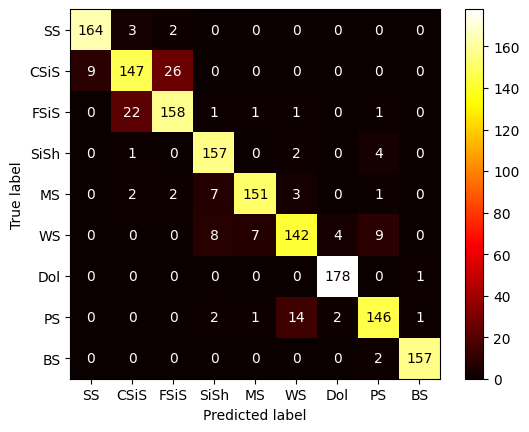

In [18]:
# Creating models with best parameters 
rfc = RandomForestClassifier(max_depth = 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, random_state= 42)   # random forest classifier
rfc.fit(X_train, np.ravel(y_train))

facies_label = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'Dol','PS', 'BS']

# plotting confusion matrix
conf_matrix = confusion_matrix(y_test, rfc.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix= conf_matrix, display_labels= facies_label)  
disp.plot(cmap = 'hot')                               

***Decision Tree Classifier***

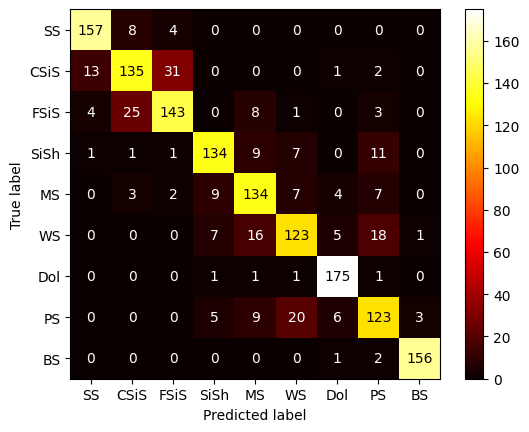

In [20]:
# Creating model with best parameters 
dtc = DecisionTreeClassifier(criterion= 'entropy', max_depth= 20, random_state= 42) # decision Tree classfier 
dtc.fit(X_train, np.ravel(y_train))

# plotting confusion matrix
conf_matrix = confusion_matrix(y_test, dtc.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix= conf_matrix, display_labels= facies_label)  
disp.plot(cmap = 'hot')    

***Support Vector Classifier***

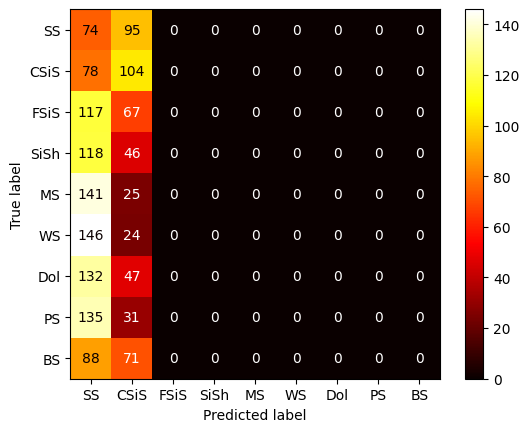

In [36]:
# Creating model with best parameters 
svc = SVC(C= 10, gamma = 1, kernel= 'rbf')                      # support vector classifier 

svc.fit(X_train_scale, np.ravel(y_train))

tmp_ = pd.DataFrame(X_test_scale, columns= ['Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS',
       'Formation_A1 LM', 'Formation_A1 SH', 'Formation_B1 LM',
       'Formation_B1 SH', 'Formation_B2 LM', 'Formation_B2 SH',
       'Formation_B3 LM', 'Formation_B3 SH', 'Formation_B4 LM',
       'Formation_B4 SH', 'Formation_B5 LM', 'Formation_B5 SH',
       'Formation_C LM', 'Formation_C SH'])
predic_ = dtc.predict(tmp_)

# plotting confusion matrix
conf_matrix_ = confusion_matrix(y_test, predic_ )
disp = ConfusionMatrixDisplay(confusion_matrix= conf_matrix_, display_labels= facies_label)  
disp.plot(cmap = 'hot')  

***4.2 Classification Report***

***Random Forest Classifier***

In [19]:
# Classification Report
print(classification_report(y_test, rfc.predict(X_test), target_names= facies_label))

              precision    recall  f1-score   support

          SS       0.95      0.97      0.96       169
        CSiS       0.84      0.81      0.82       182
        FSiS       0.84      0.86      0.85       184
        SiSh       0.90      0.96      0.93       164
          MS       0.94      0.91      0.93       166
          WS       0.88      0.84      0.86       170
         Dol       0.97      0.99      0.98       179
          PS       0.90      0.88      0.89       166
          BS       0.99      0.99      0.99       159

    accuracy                           0.91      1539
   macro avg       0.91      0.91      0.91      1539
weighted avg       0.91      0.91      0.91      1539



***Decision Tree Classifier***

In [21]:
# Classification Report
print(classification_report(y_test, dtc.predict(X_test), target_names= facies_label))

              precision    recall  f1-score   support

          SS       0.90      0.93      0.91       169
        CSiS       0.78      0.74      0.76       182
        FSiS       0.79      0.78      0.78       184
        SiSh       0.86      0.82      0.84       164
          MS       0.76      0.81      0.78       166
          WS       0.77      0.72      0.75       170
         Dol       0.91      0.98      0.94       179
          PS       0.74      0.74      0.74       166
          BS       0.97      0.98      0.98       159

    accuracy                           0.83      1539
   macro avg       0.83      0.83      0.83      1539
weighted avg       0.83      0.83      0.83      1539



***Support Vector Classifier***

In [33]:
# Classification Report
print(classification_report(y_test, predic_, target_names= facies_label))

              precision    recall  f1-score   support

          SS       0.07      0.44      0.12       169
        CSiS       0.20      0.57      0.30       182
        FSiS       0.00      0.00      0.00       184
        SiSh       0.00      0.00      0.00       164
          MS       0.00      0.00      0.00       166
          WS       0.00      0.00      0.00       170
         Dol       0.00      0.00      0.00       179
          PS       0.00      0.00      0.00       166
          BS       0.00      0.00      0.00       159

    accuracy                           0.12      1539
   macro avg       0.03      0.11      0.05      1539
weighted avg       0.03      0.12      0.05      1539



C:\Users\sanju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sanju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sanju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

***4.3. Learning Curves***

***Decision Tree Classifier and Random Forest Classifier***

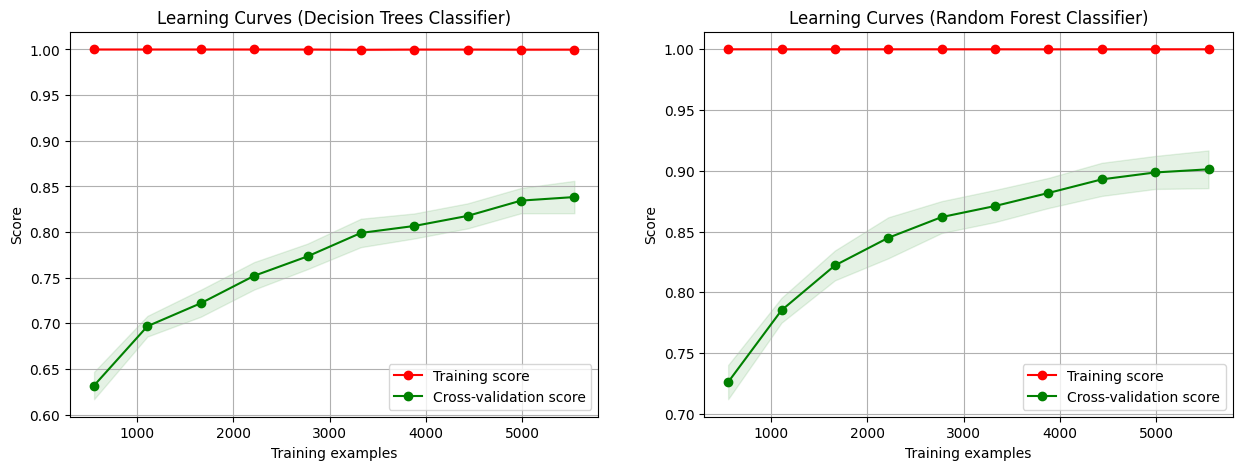

In [88]:
# plotting learning curves
startified_k_fold = StratifiedKFold(n_splits= 10, shuffle= True, random_state= 42)
fig, axes = plt.subplots(1,2, figsize=(15,5))
i = 0

for name in [dtc, rfc]:
    train_sizes, train_scores, test_scores = learning_curve(
        name, X_train, y_train, cv= startified_k_fold, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    axes[i].set_xlabel("Training examples")
    axes[i].set_ylabel("Score")
    axes[i].grid(True)

    axes[i].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[i].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[i].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes[i].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    axes[i].legend(loc='lower right')
    if i==0:
        axes[i].set_title('Learning Curves (Decision Trees Classifier)')
    else:
        axes[i].set_title('Learning Curves (Random Forest Classifier)')
    
    i =i+1

***Support Vector Classifier***

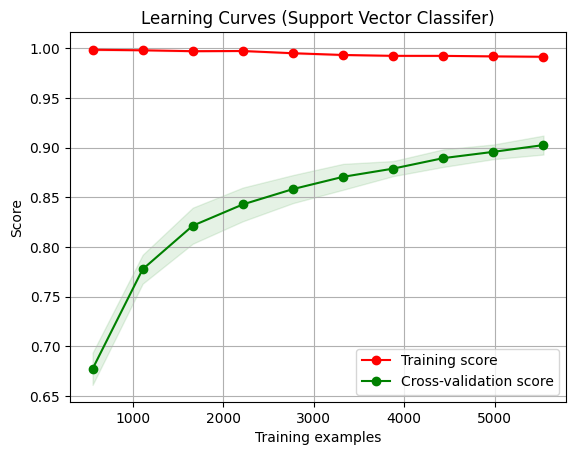

In [77]:
# plotting learning curves
startified_k_fold = StratifiedKFold(n_splits= 10, shuffle= True, random_state= 42)

for name in [svc]:
    train_sizes, train_scores, test_scores = learning_curve(
        name, X_train_scale, y_train, cv= startified_k_fold, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title('Learning Curves (Support Vector Classifier)')
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

Now the gap between training and cross validation curve indicates few things:
1. For all algorithms, it can be seen that training scores are always higher than tests or cross-validation scores which is considered almost standard of ML.

2. In all of the classifiers, we can see that the training score is still around the maximum (near 1), and validation could be increased with more new data samples. Comparing with the schematic chart above, we do not see the turning point for the validation curve in these plots meaning we are not in the area of over-fitting at the end of the training. We also can not claim that these classifiers(such as the random forest algorithm) have the highest performance because non of the validation curves did not flatten at the end of the training process.
   
3. With fewer training samples, it’s common to see a large gap between the training and cross-validation scores, indicating the model needs more data to generalize well.
   
4. As the training set size increases, both the training score and CV score tend to stabilize. In a well-behaved model, they converge toward each other, reducing the gap between them.Thus if we continue to add more training data, as the model is likely to perform even better with a larger dataset.

5. Hence it suggests that the model won't work perfectly in blind or unseen data

**5. Blind Well Classification**

In [24]:
# Blind well
blind_df.sample(5)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies_Label,Formation_A1 LM,Formation_A1 SH,Formation_B1 LM,Formation_B1 SH,Formation_B2 LM,Formation_B2 SH,Formation_B3 LM,Formation_B3 SH,Formation_B4 LM,Formation_B4 SH,Formation_B5 LM,Formation_B5 SH,Formation_C LM,Formation_C SH
1934,4,A1 LM,KIMZEY A,2962.0,50.190,0.849,7.125,10.6465,3.34058,2,0.500,SiSh,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1847,1,A1 SH,KIMZEY A,2918.5,73.816,0.769,5.226,11.3480,3.28928,1,1.000,SS,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2117,2,B4 SH,KIMZEY A,3053.5,63.599,0.612,14.085,11.4305,3.33104,1,0.667,CSiS,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2151,8,B5 LM,KIMZEY A,3070.5,21.848,0.974,6.438,11.6780,4.06252,2,0.957,PS,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2257,6,C LM,KIMZEY A,3124.0,37.081,1.269,5.612,2.8470,3.98222,2,0.690,WS,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [25]:
# label column which is the facies column
y_blind = blind_df['Facies']

# removing unnecessary columns
well_vectors_blind = blind_df.drop(columns=['Formation', 'Well Name', 'Facies_Label', 'Facies'])

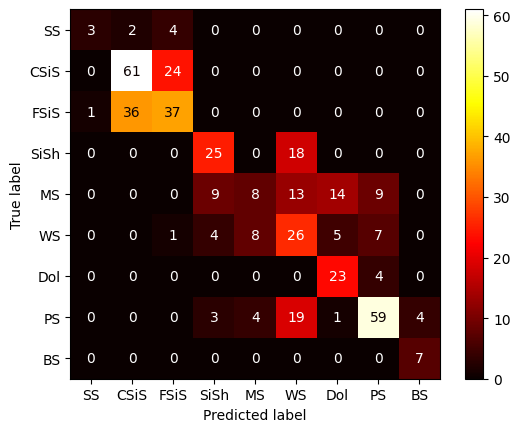

In [26]:
rfc_blind_predict = rfc.predict(well_vectors_blind)

# plotting confusion matrix
conf_matrix = confusion_matrix(y_blind, rfc_blind_predict)
disp = ConfusionMatrixDisplay(confusion_matrix= conf_matrix, display_labels= facies_label)  
disp.plot(cmap = 'hot') 

In [27]:
accuracy_score(y_blind, rfc_blind_predict)

0.5671981776765376

In [28]:
# Classification Report
print(classification_report(y_blind, rfc_blind_predict, target_names= facies_label))

              precision    recall  f1-score   support

          SS       0.75      0.33      0.46         9
        CSiS       0.62      0.72      0.66        85
        FSiS       0.56      0.50      0.53        74
        SiSh       0.61      0.58      0.60        43
          MS       0.40      0.15      0.22        53
          WS       0.34      0.51      0.41        51
         Dol       0.53      0.85      0.66        27
          PS       0.75      0.66      0.70        90
          BS       0.64      1.00      0.78         7

    accuracy                           0.57       439
   macro avg       0.58      0.59      0.56       439
weighted avg       0.57      0.57      0.56       439



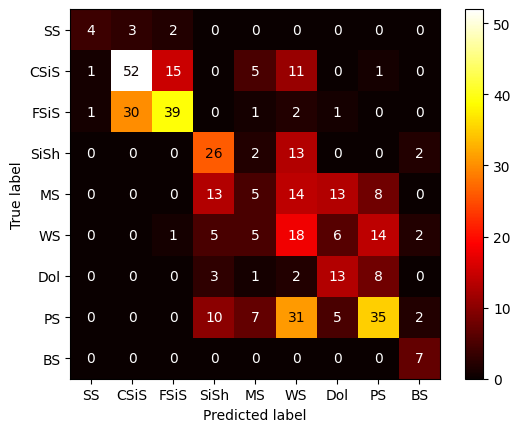

In [29]:
# predicting using Decision Tree Classifier
dtc_blind_predict = dtc.predict(well_vectors_blind)

# plotting confusion matrix
conf_matrix = confusion_matrix(y_blind, dtc_blind_predict)
disp = ConfusionMatrixDisplay(confusion_matrix= conf_matrix, display_labels= facies_label)  
disp.plot(cmap = 'hot') 

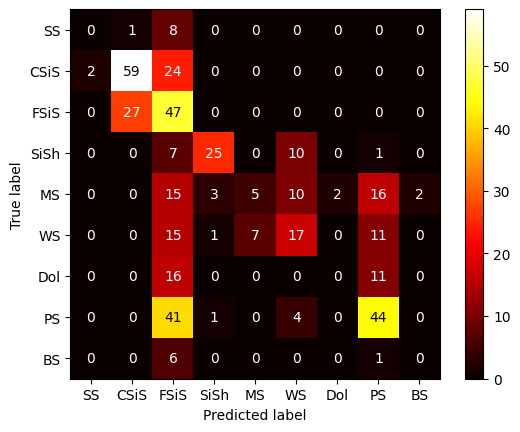

In [90]:
scaled = scaler.fit_transform(well_vectors_blind)

# predicting using Decision Tree Classifier
svc_blind_predict = svc.predict(scaled)

# plotting confusion matrix
conf_matrix = confusion_matrix(y_blind, svc_blind_predict)
disp = ConfusionMatrixDisplay(confusion_matrix= conf_matrix, display_labels= facies_label)  
disp.plot(cmap = 'hot') 

In [91]:
accuracy_score(y_blind, svc_blind_predict)

0.44874715261959

In [30]:
accuracy_score(y_blind, dtc_blind_predict)

0.4533029612756264

In [31]:
# Classification Report
print(classification_report(y_blind, dtc_blind_predict, target_names= facies_label))

              precision    recall  f1-score   support

          SS       0.67      0.44      0.53         9
        CSiS       0.61      0.61      0.61        85
        FSiS       0.68      0.53      0.60        74
        SiSh       0.46      0.60      0.52        43
          MS       0.19      0.09      0.13        53
          WS       0.20      0.35      0.25        51
         Dol       0.34      0.48      0.40        27
          PS       0.53      0.39      0.45        90
          BS       0.54      1.00      0.70         7

    accuracy                           0.45       439
   macro avg       0.47      0.50      0.47       439
weighted avg       0.48      0.45      0.45       439

